#Introduction
This notebook analysizes the national and state voter registration trends.

**Purpose**
The purpose of this project is to understand voter registration on a national and a state scale.

<p>&nbsp;</p>

**Goals**
The goal of this project is to accurately understand national and state trends regarding voter registration. I am looking to answer why certain trends exists during which periods and why.

<p>&nbsp;</p>

**Importance**
Reading this notebook and understanding the data visualized will give you a better understanding of certain trends for people registering to vote. Understanding this notebook will give personal insight during voting season, such as answering the question "Are you registering to vote people you want to or you have been targeting and feel compelled to?" Industries can also utilize this information by understanding when is a good time to try to advertise more people to vote. A lot of the information in this notebook would best be utilized with the understanding of other analytics to completely understand trends.

<p>&nbsp;</p>

**Research Questions**
* Question 1: As a nation, did states have more people vote to register in 2016 or 2020?

* Question 2: What trends do we see in voter registration in California for both 2016 and 2020? Are they the same?

<p>&nbsp;</p>

**Assumptions/Methodology/Scope**

The methods that will mostly be used will be data visualization and mapping of the data. I assume that the more populated states will have the most new registered votes. I also believe that 2016 would have more new voters because of Trump and Hillary both running for president. These election caused a lot of controversy which could have encouraged more people to vote.

<p>&nbsp;</p>

**Data Content**

This dataset is a csv file of 106 data points. It contains 12 states each categorized in 5 months during 2016 and 2020 with the new registered voters per month.
The dataframe cane be found here [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv)

<p>&nbsp;</p>

**Attributes**

| Column  | Description |
| :------ | :---------- |
| Jurisdiction | The data where the data was taken |
| Year| The year of the data |
| Month | The month during when new voters registered |
| New registered voters | The amount of new registered voters |

<p>&nbsp;</p>


# Acquiring and Loading Data

In [ ]:
'''
Loading in libraries
'''
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

In [7]:
'''
Jurisdiction - these are the states of the recorded data
Year - This was the year of the recorded data
Month - This is the month of the recorded data
New Registered Voters - This is the amount of new registered voters based on the previous criteria.
'''
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [ ]:
'''
Checks all columns to see if any of them is empty.
There is no missing data.
'''
voters.isna().values.any()

False

In [ ]:
'''
Jurisdiction is a string object.
Year is a 64-bit integer.
Month is a string object.
New registered voters is a 64-bit integer.
'''
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [3]:
'''
Renaming the Jurisdiction column to name.
Renaming the New registered voters column to registered_voters
'''
voters = voters.rename(columns={"Jurisdiction":"NAME", "New registered voters" : "registered_voters"})

In [ ]:
'''
Potential limitations in my data include full date ranges. Most
of the data is limited during specific months in 2016 and 2020, meaning
we only get part of the picture. Also not all states are listed in the data so we
are not getting a full national trend our of this data.
'''

#Data Analysis

In [ ]:
'''
The highest amount of new voter registration was Febuary 2020 in California.
During this time California had 238281 registered voters.
'''
voters.loc[voters.registered_voters == voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [ ]:
'''
The average voter registration is 48223.
'''
voters.registered_voters.mean()

48223.46226415094

In [ ]:
'''
Voter registration was higher than the calculated average
36 times.
'''
high_voters = voters.loc[voters.registered_voters > voters.registered_voters.mean()]
high_voters["NAME"].count()

36

In [ ]:
'''
Arizona went over the national average 3 times.
California went over the national average 7 times.
Florida went over the national average 7 times.
Georgia went over the national average 1 time.
Illinois went over the national average 4 times.
North Carolina went over the national average 6 times.
Texas went over the national average 8 times.
'''
high_voters.groupby("NAME")["NAME"].count()

,NAME
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


In [ ]:
'''
California, Texas, and Florida have the highest average voter registration. This
is probably due to the high population in these states.
California has an average of 144545.
Texas has an average of 114610.
Florida has an average of 65868
'''
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


#Data Visualization

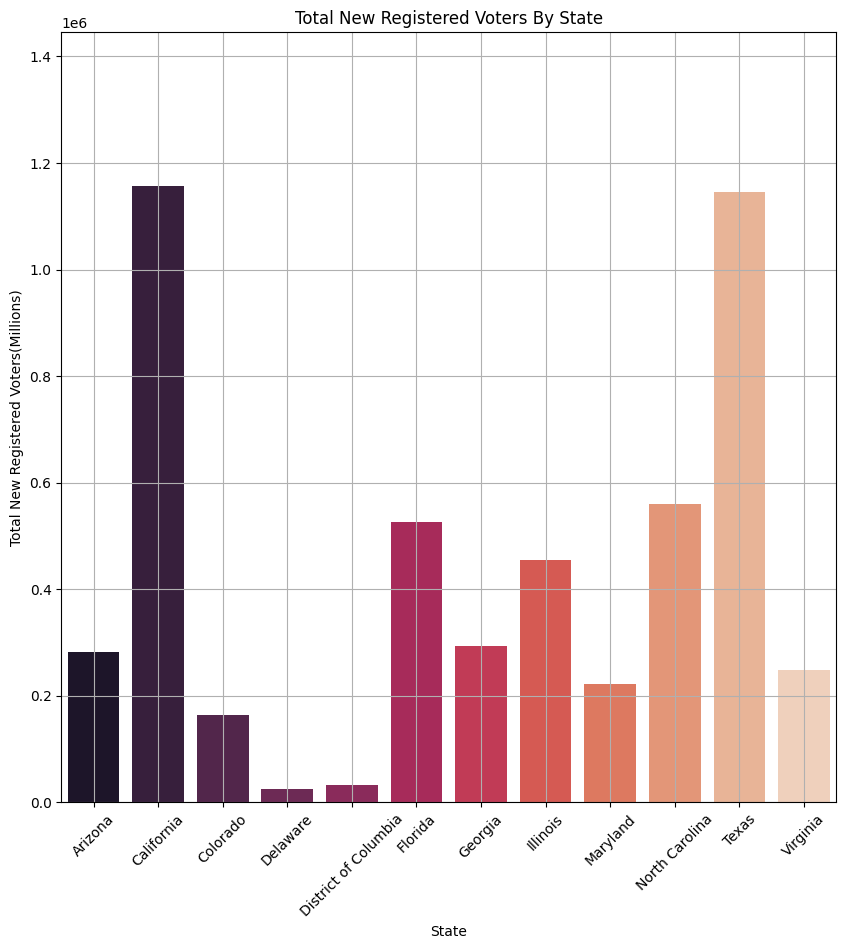

In [ ]:
'''
California and Texas have the highest new total registered voters. This
can be explained because these states have the highest population sizes.
The two next closest states are North Carolina and Florida which have almost half
of either California or Texas.
'''
total_voters = voters.groupby("NAME")["registered_voters"].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 10))
colors = sns.color_palette("rocket", 12)
sns.barplot(total_voters, ax=ax, y="registered_voters", x = "NAME", hue = "NAME", palette=colors)
plt.ylim(0, total_voters["registered_voters"].max()*5/4)
plt.yscale("linear")
plt.xticks(rotation = 45)
plt.xlabel("State")
plt.ylabel("Total New Registered Voters (Millions)")
plt.title("Total New Registered Voters By State")
plt.grid()
plt.show()

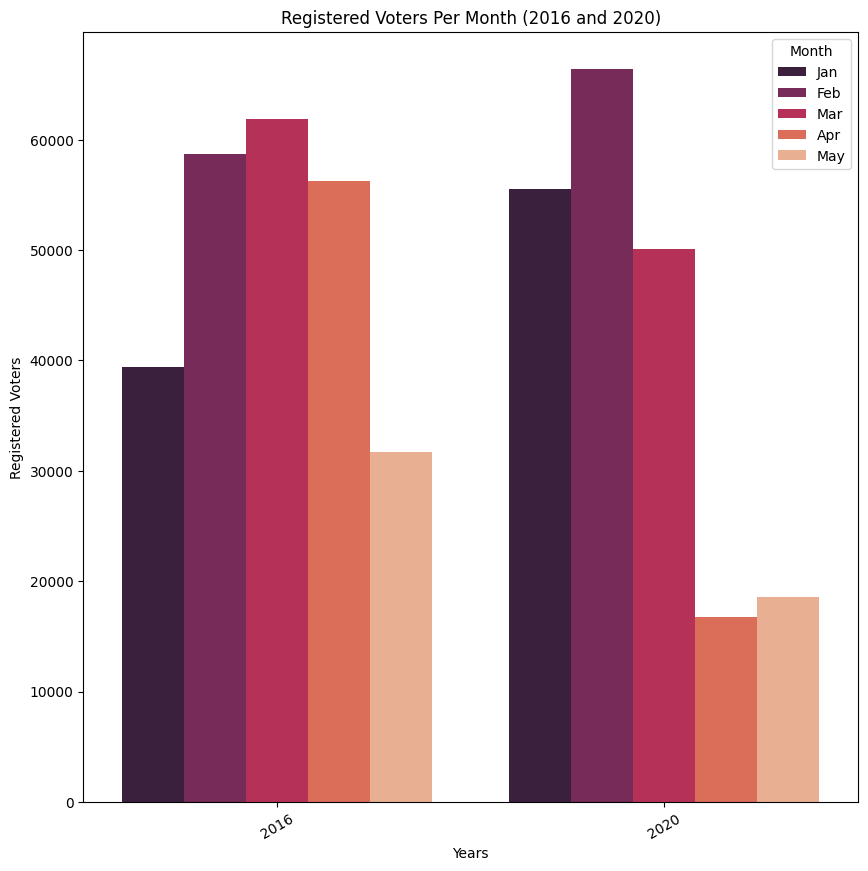

In [ ]:
'''
In 2016 new registered voteres peaked in March while in
2020 new registered voters peaked in February. In 2016 new registered
voters seemed to remain higher even after the peak month, unlike 2020
where new registered voters heavily dropped in April and May.
'''
fig, ax = plt.subplots(figsize=(10, 10))
colors = sns.color_palette("rocket", 5)
sns.barplot(voters, x="Year", y="registered_voters", hue = "Month", errorbar = None, palette=colors, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("Years")
plt.ylabel("Registered Voters")
plt.title("Registered Voters Per Month (2016 and 2020)")
plt.show()

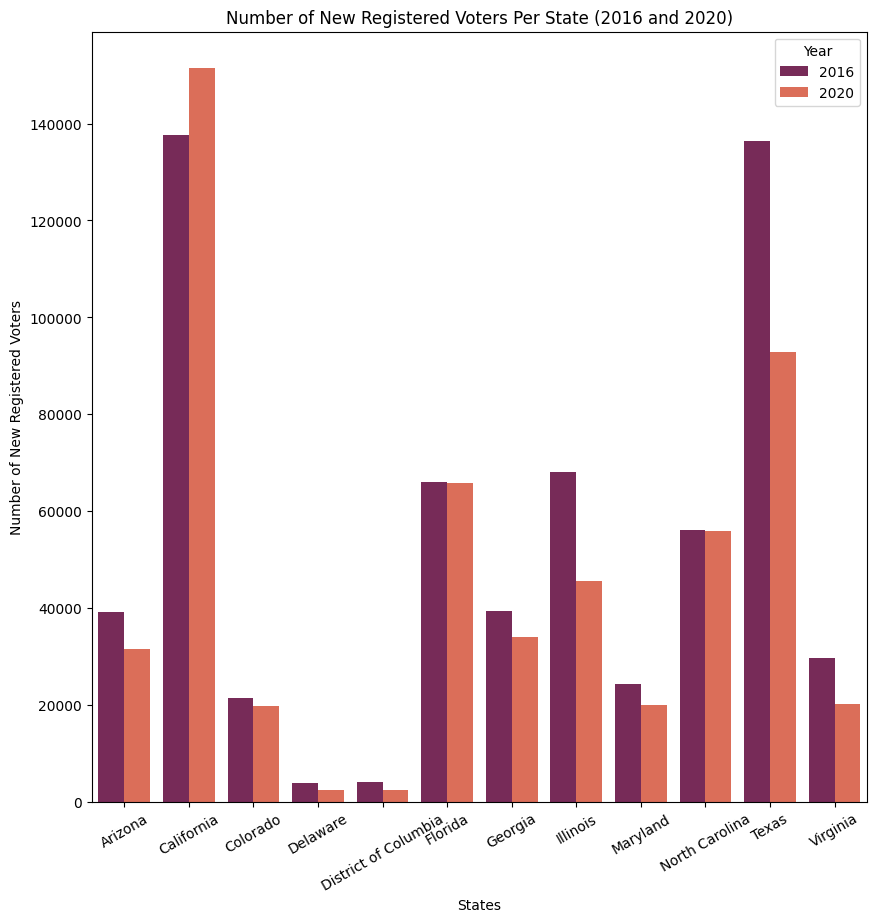

In [ ]:
'''
On the national scale, states tended to have more new people register
to vote during 2016. The only exception is California. While the real reason
for this is unknown, Hillary Clinton's nomination by the Demoncratic party
is a possible explaination because it could have been an incentive for
unregistered voters to register.
'''
fig, ax = plt.subplots(figsize=(10, 10))
colors = sns.color_palette("rocket", 2)
sns.barplot(voters, ax=ax, x="NAME", y="registered_voters", hue = "Year", palette=colors, errorbar=None)
plt.xlabel("States")
plt.ylabel("Number of New Registered Voters")
plt.title("Number of New Registered Voters Per State (2016 and 2020)")
plt.xticks(rotation = 30)
plt.show()

In [8]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
states.reset_index()
'''
Loading in dataset...
'''

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.07 MiB/s, done.
Resolving deltas: 100% (13/13), done.


'\nLoading in dataset...\n'

In [ ]:
'''
Set a bounding box with these x and y.
'''
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

In [ ]:
'''
This new dataframe groups each state together and gets their average
amount of new registered voters.
'''
average = voters.groupby("NAME")["registered_voters"].mean().reset_index()

In [ ]:
'''
This merges the boundary box with the
new dataset created early. Allowing for the states to
have their mapping data along with their new
registered voters data.
'''

state_average = bbox.merge(average, on = "NAME", how="inner")

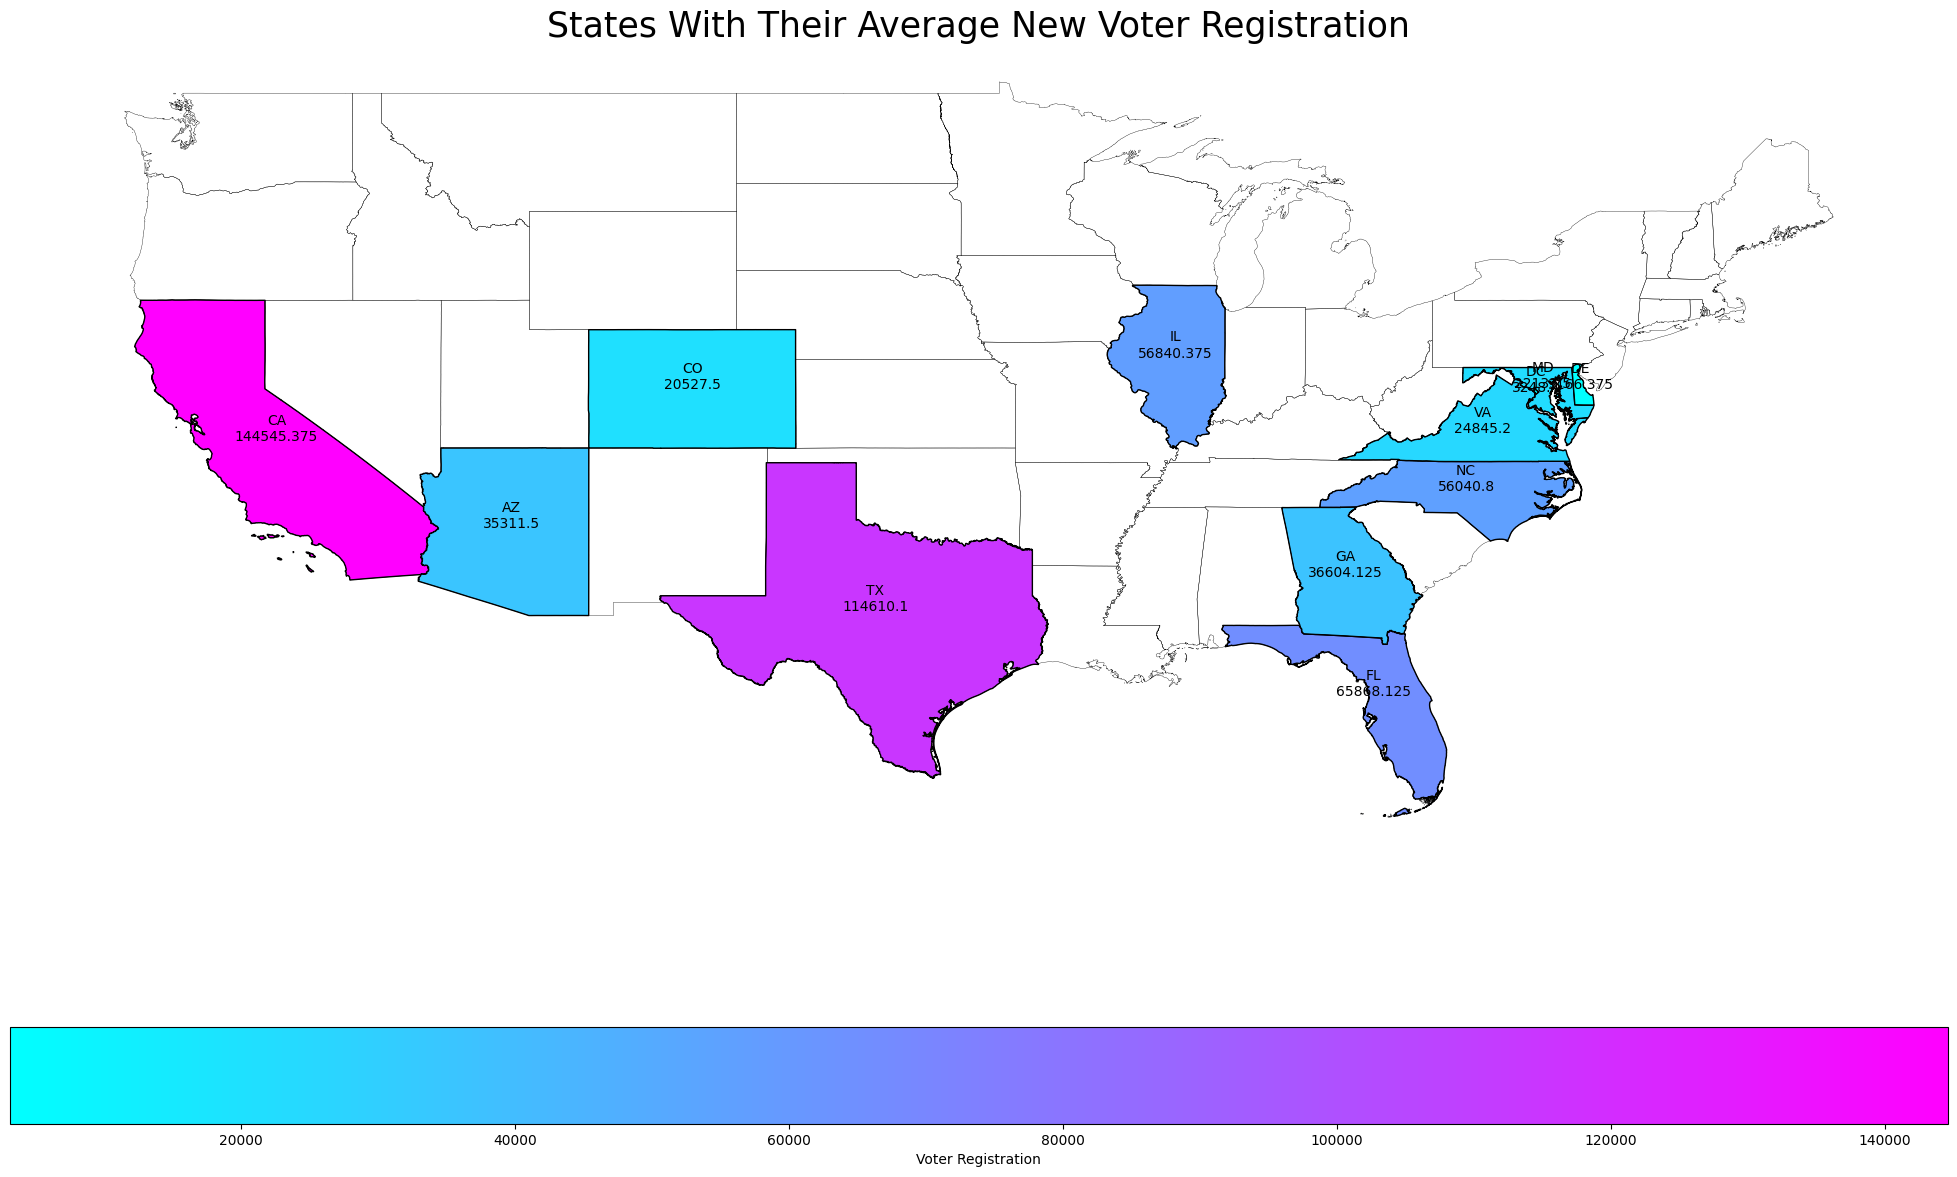

In [ ]:
'''
California and Texas have the highest new registered voters.
'''
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
bbox.boundary.plot(ax = ax, linewidth = .25, color = "Black")
state_average.apply(lambda x: ax.annotate(text=x.STUSPS + '\n' + str(x.registered_voters), xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=10),axis=1)
state_average.plot(ax=ax, column = "registered_voters", cmap="cool", edgecolor = "Black", legend = True, legend_kwds={"label": "Voter Registration", "orientation": "horizontal"})
plt.title("States With Their Average New Voter Registration", fontsize=25)
ax.set_axis_off()
plt.show()

#Conclusion

<p>&nbsp;</p>

**Insights**

This notebook analyzed the different trends from the new registered voters dataset. From the analysis done, the states with the higher populations had the most new registered voters. The peak in new registered voters peaked in the first 2-3 month in 2016 and 2020. Also, 2016 had more new registered voters which could be attributed to Hillary Clinton being the first president nominee and Trump's popularity.

<p>&nbsp;</p>

**Suggestions**

With the information from this notebook, I suggest that advertising for political campaigns should increase in the same months as new people are registering to vote. I also suggest specifically targeting higher populated states. The states with the highest average new voters is California, Texas, and Florida, which are the states that we should look more at. The only state to see an upwards trend in new voters from 2016 to 2020 was California, which creates more potential at reaching newer voters. We should also investigate why states are decreasing in new registered voters.

<p>&nbsp;</p>

**Future Work**

Future work could include understanding the voting trends of the states. We can fully understand the voting trends if we do not know how the new registered voters are voting. Specifically, we should check the party those new voters are registering for, whether it is Democrat, Republican, or Independent. I also believe that we should investigate more years because to see if these trends continued throughout the years.

<p>&nbsp;</p>




##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [ ]:
https://github.com/DevionRosa/VotersDataAnalysis

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
Devion Rosa